In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import us
import copy
import tqdm.auto as tqdm
import geopandas as gpd
import numpy as np
import pandas as pd
from shapefiles import shapefiles, school_district_shapefiles, ce_to_name
from relationship import full_relationships, create_relationships
from stats_for_shapefile import compute_statistics_for_shapefile, compute_summed_shapefile_all_keys, sum_keys
from create_website import (
    full_shapefile,
    shapefile_without_ordinals,
    add_ordinals,
    get_statistic_categories,
    create_page_jsons,
)
from election_data import with_election_results

/home/kavi/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
full = full_shapefile()

computing statistics:   0%|          | 0/20 [00:00<?, ?it/s]

adding ordinals:   0%|          | 0/20 [00:00<?, ?it/s]

/home/kavi/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [58]:
from urbanstats.games.quiz import *

In [3]:
from datetime import datetime, timedelta
import pytz

In [5]:
i = 56

In [6]:
date = datetime(
    2023, 9, 28, tzinfo=pytz.timezone("Pacific/Kiritimati")
) + timedelta(days=i - 56)

In [50]:
a = shapefiles["states"].load_file()

In [61]:
sh = shapefiles["csas"]

In [84]:
from relationship import states_for, states_for_all

In [100]:
sfa = states_for_all()

In [103]:
{x : y for x, y in sfa.items() if len(y) == 2}

{'Eufaula MSA, AL-GA, USA': ['Alabama, USA', 'Georgia, USA'],
 'Union City MSA, TN-KY, USA': ['Kentucky, USA', 'Tennessee, USA'],
 'Augusta-Richmond County MSA, GA-SC, USA': ['Georgia, USA',
  'South Carolina, USA'],
 'Charlotte-Concord-Gastonia MSA, NC-SC, USA': ['South Carolina, USA',
  'North Carolina, USA'],
 'La Crosse-Onalaska MSA, WI-MN, USA': ['Minnesota, USA', 'Wisconsin, USA'],
 'Omaha-Council Bluffs MSA, NE-IA, USA': ['Iowa, USA', 'Nebraska, USA'],
 'Grand Forks MSA, ND-MN, USA': ['Minnesota, USA', 'North Dakota, USA'],
 'Lewiston MSA, ID-WA, USA': ['Idaho, USA', 'Washington, USA'],
 'Providence-Warwick MSA, RI-MA, USA': ['Massachusetts, USA',
  'Rhode Island, USA'],
 'Bluefield MSA, WV-VA, USA': ['Virginia, USA', 'West Virginia, USA'],
 'Paducah MSA, KY-IL, USA': ['Kentucky, USA', 'Illinois, USA'],
 'Columbus MSA, GA-AL, USA': ['Alabama, USA', 'Georgia, USA'],
 'Virginia Beach-Norfolk-Newport News MSA, VA-NC, USA': ['North Carolina, USA',
  'Virginia, USA'],
 'Marinette MSA

In [96]:
{x : y for x, y in sfa.items() if len(y) == 1}

{'New Mexico, USA': ['New Mexico, USA'],
 'South Dakota, USA': ['South Dakota, USA'],
 'California, USA': ['California, USA'],
 'Kentucky, USA': ['Kentucky, USA'],
 'Alabama, USA': ['Alabama, USA'],
 'Georgia, USA': ['Georgia, USA'],
 'Arkansas, USA': ['Arkansas, USA'],
 'Pennsylvania, USA': ['Pennsylvania, USA'],
 'Missouri, USA': ['Missouri, USA'],
 'Colorado, USA': ['Colorado, USA'],
 'Utah, USA': ['Utah, USA'],
 'Oklahoma, USA': ['Oklahoma, USA'],
 'Tennessee, USA': ['Tennessee, USA'],
 'Wyoming, USA': ['Wyoming, USA'],
 'New York, USA': ['New York, USA'],
 'Indiana, USA': ['Indiana, USA'],
 'Kansas, USA': ['Kansas, USA'],
 'Idaho, USA': ['Idaho, USA'],
 'Alaska, USA': ['Alaska, USA'],
 'Nevada, USA': ['Nevada, USA'],
 'Illinois, USA': ['Illinois, USA'],
 'Vermont, USA': ['Vermont, USA'],
 'Minnesota, USA': ['Minnesota, USA'],
 'Iowa, USA': ['Iowa, USA'],
 'South Carolina, USA': ['South Carolina, USA'],
 'New Hampshire, USA': ['New Hampshire, USA'],
 'Delaware, USA': ['Delaware, US

In [29]:
at_pop = full[full.population >= min_pop]
by_type = {type : at_pop[at_pop.type == type] for type in types}

In [6]:
total = 0
names = [name for type in by_type for name in by_type[type].longname]
name_to_idx = {name: i for i, name in enumerate(names)}
stat_to_idx = {stat: i for i, stat in enumerate(stats)}

In [7]:
for type in by_type:
    print(type, by_type[type].shape)


City (89, 465)
County (280, 465)
MSA (192, 465)
State (52, 465)
Urban Area (163, 465)


In [8]:
stats[10]

'citizenship_citizen_by_naturalization'

In [9]:
# plt.hist(at_pop[stats[10]])

In [10]:
elements = [generate_quiz(("daily", i)) for i in tqdm.trange(1000)]
questions = list(zip(*elements))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
import matplotlib.pyplot as plt

In [12]:
quizzes = [full_quiz(("debug", i)) for i in tqdm.trange(5, 15)]

  0%|          | 0/10 [00:00<?, ?it/s]

/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  stat_column_original = rng.choice(stats)


FAILED City rent_burden_under_20 100 200
FAILED County generation_genz 100 200
FAILED County generation_boomer 100 200
FAILED City generation_genalpha 50 100
FAILED State education_field_stem 200 400
FAILED Urban Area citizenship_citizen_by_birth 200 400
FAILED City rent_burden_over_40 200 400
FAILED City household_income_under_50k 200 400
FAILED County transportation_means_car 200 400
FAILED Urban Area rent_or_own_rent 100 200
FAILED County housing_per_pop 50 100
FAILED State insurance_coverage_private 50 100
FAILED Urban Area transportation_means_car 200 400
FAILED State mean_dist_Airport_updated 200 400
FAILED MSA housing_per_pop 100 200
FAILED State individual_income_under_50k 50 100


In [13]:
# print(discordify(q))

In [14]:
import base64

In [15]:
import urllib
import gzip

In [21]:
cateogries

NameError: name 'cateogries' is not defined

In [31]:
links = [
    custom_quiz_link(("custom-debug-1", i), f"test v5 #{i}", localhost=False)
    for i in range(1, 10)
]

/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  stat_column_original = rng.choice(stats)


FAILED State rent_or_own_rent 100 200


KeyboardInterrupt: 

In [20]:
print("\n".join(links))

https://urbanstats.org/quiz.html?short=TzZxkJ0ScF
https://urbanstats.org/quiz.html?short=di_ujDWPQ1
https://urbanstats.org/quiz.html?short=_rON6YIhoS
https://urbanstats.org/quiz.html?short=_epISpX5Fq
https://urbanstats.org/quiz.html?short=pkHHqeTb6P
https://urbanstats.org/quiz.html?short=PtYXhftLrF
https://urbanstats.org/quiz.html?short=-4zcDHAdDs
https://urbanstats.org/quiz.html?short=oYeROPbG1U
https://urbanstats.org/quiz.html?short=JzMDHjkv_b


In [241]:
# for i, q in enumerate(quizzes, 1):
#     res = urllib.parse.urlencode(
#         dict(
#             mode="custom",
#             name=f"test v3 #{i}",
#             quiz=base64.b64encode(gzip.compress(json.dumps(q).encode("utf-8"))).decode(
#                 "utf-8"
#             ),
#         )
#     )
# #     print(f"http://localhost:8000/quiz.html?" + res)
#     print(f"https://urbanstats.org/quiz.html?" + res)

In [1]:
import requests

In [11]:
response = requests.post(
#     "http://localhost:5000/lengthen",
    "https://persistent.urbanstats.org/juxtastat/get_per_question_stats",
    data=dict(day=49),
)
print(response.content)
response.json()

b'{"per_question":[367,271,251,126,371],"total":402}\n'


{'per_question': [367, 271, 251, 126, 371], 'total': 402}

In [36]:
response = requests.post(
#     "http://localhost:5000/lengthen",
    "https://persistent.urbanstats.org/juxtastat/latest_day",
    data=dict(user=1984),
)
print(response.content)
response.json()

b'{"latest_day":1}\n'


{'latest_day': 1}

In [38]:
response = requests.post(
    #     "http://localhost:5000/lengthen",
    "https://persistent.urbanstats.org/juxtastat/store_user_stats",
    data=dict(
        user=1984,
        day_stats=json.dumps([
            (0, [True, True, True, False, False]),
            (1, [True, True, False, False, True]),
        ]),
    ),
)
print(response.content)
response.json()

b'{"success":true}\n'


{'success': True}

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [175]:
import os


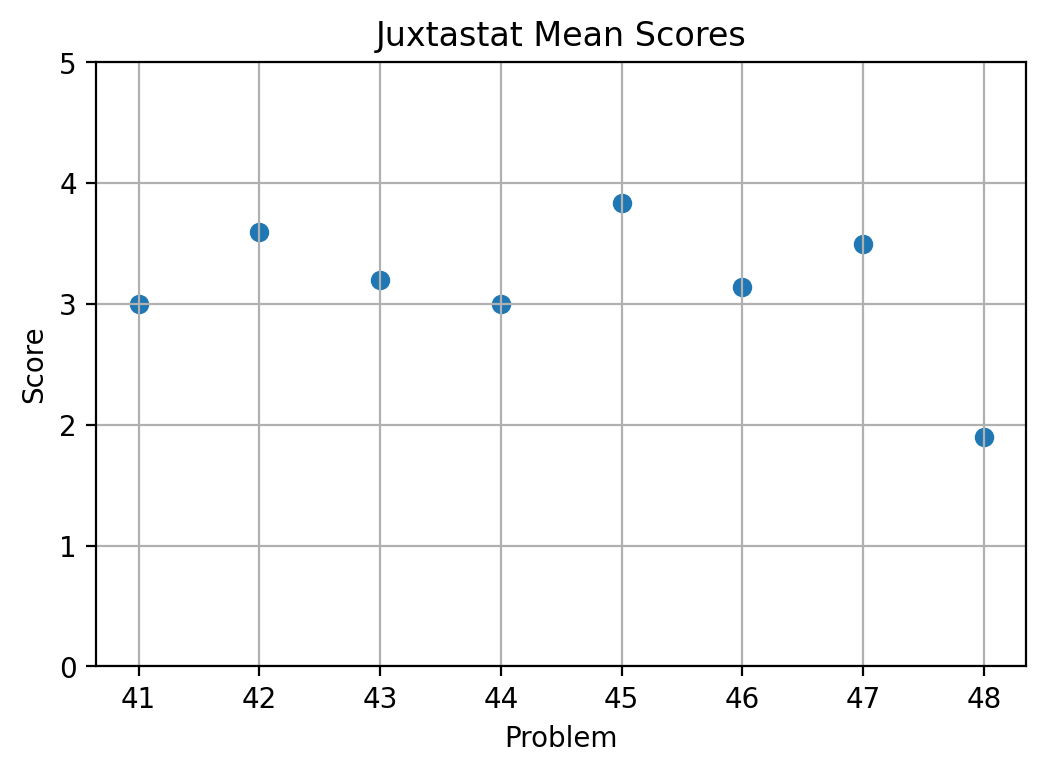

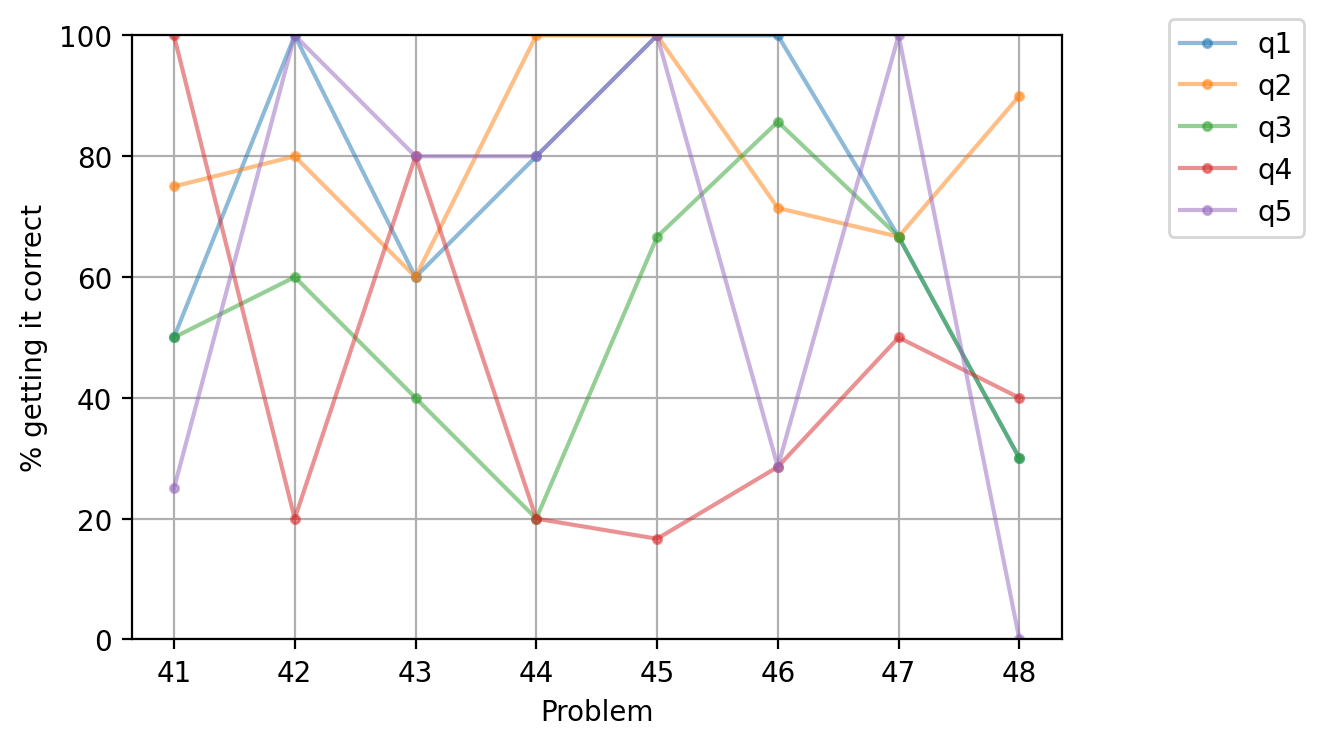

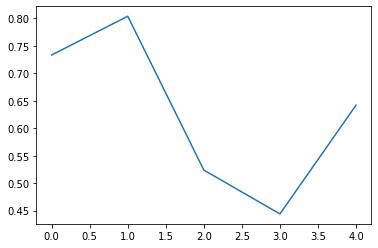

In [171]:
plt.plot([means[q].mean() for q in questions])

93.7003769304301
154.6240687014901
72.53099701407594
100.62102090981524
63.59817352411686
87.11987797938568
49.113496014800695
52.80547243574202
31.583477962086636
34.3760767215029


/home/kavi/census-centroid-blocks/population_density/urbanstats/games/quiz.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  return pct_diff(y, x)


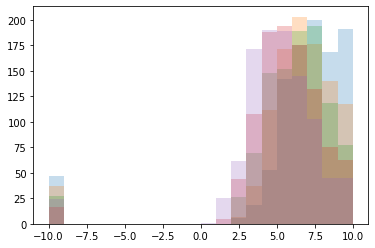

In [270]:
overall = []
for i, by_question in enumerate(questions):
    diffs = np.log2([np.clip(pct_diff(x["stat_a"], x["stat_b"]), 2 ** -10, 2 ** 10) for x in by_question])
    plt.hist(diffs, label=f"{i + 1}", alpha=0.25, bins=np.linspace(-10, 10, 21))
    print(2 ** diffs.mean())
    print(2 ** np.median(diffs))    
    overall.append(diffs)

In [21]:
overall = np.concatenate(overall)

In [24]:
np.percentile(2 ** overall, [10, 30, 50, 70, 90])

array([ 11.59805262,  34.34769249,  76.28328965, 166.62200773,
       498.84008719])

In [4]:
min_pop = 200_000

In [2]:
import requests
import gzip
import csv
import io

/home/kavi/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
# Mean daily high by season
# Mean % of highs above 90
# Mean % of highs below 40
    # 2m temperature
# Mean hours sunshine
# Mean days with cloudiness > X%
    # Total cloud cover [NOT INCLUDED FOR NOW]
# Mean yearly rainfall
# Mean yearly snowfall
    # Large-scale precipitation
    # Large-scale snowfall
# Mean dew point
# Mean % of mean dew points above 65
    # 2m dewpoint temperature
# Mean wind speed
    # 10m u-component of wind
    # 10m v-component of wind

In [5]:
import shapely

In [2]:
from urbanstats.weather.era5 import all_results, bounding_boxes, dates_in_month
from urbanstats.weather.weather_statistic import *
from urbanstats.weather.stats import *
from urbanstats.weather.utils import *

In [3]:
from permacache import stable_hash

In [4]:
cstats = compute_statistics(statistics, 2009)

2021 1 continental_us
2021 1 hawaii
2021 1 puerto_rico
2021 1 ak_west
2021 1 ak_east
2021 2 continental_us
2021 2 hawaii
2021 2 puerto_rico
2021 2 ak_west
2021 2 ak_east
2021 3 continental_us
2021 3 hawaii
2021 3 puerto_rico
2021 3 ak_west
2021 3 ak_east
2021 4 continental_us
2021 4 hawaii
2021 4 puerto_rico
2021 4 ak_west
2021 4 ak_east
2021 5 continental_us
2021 5 hawaii
2021 5 puerto_rico
2021 5 ak_west
2021 5 ak_east
2021 6 continental_us
2021 6 hawaii
2021 6 puerto_rico
2021 6 ak_west
2021 6 ak_east
2021 7 continental_us
2021 7 hawaii
2021 7 puerto_rico
2021 7 ak_west
2021 7 ak_east
2021 8 continental_us
2021 8 hawaii
2021 8 puerto_rico
2021 8 ak_west
2021 8 ak_east
2021 9 continental_us
2021 9 hawaii
2021 9 puerto_rico
2021 9 ak_west
2021 9 ak_east
2021 10 continental_us
2021 10 hawaii
2021 10 puerto_rico
2021 10 ak_west
2021 10 ak_east
2021 11 continental_us
2021 11 hawaii
2021 11 puerto_rico
2021 11 ak_west
2021 11 ak_east
2021 12 continental_us
2021 12 hawaii
2021 12 puerto_ri

2014 12 ak_east
2013 1 continental_us
2013 1 hawaii
2013 1 puerto_rico
2013 1 ak_west
2013 1 ak_east
2013 2 continental_us
2013 2 hawaii
2013 2 puerto_rico
2013 2 ak_west
2013 2 ak_east
2013 3 continental_us
2013 3 hawaii
2013 3 puerto_rico
2013 3 ak_west
2013 3 ak_east
2013 4 continental_us
2013 4 hawaii
2013 4 puerto_rico
2013 4 ak_west
2013 4 ak_east
2013 5 continental_us
2013 5 hawaii
2013 5 puerto_rico
2013 5 ak_west
2013 5 ak_east
2013 6 continental_us
2013 6 hawaii
2013 6 puerto_rico
2013 6 ak_west
2013 6 ak_east
2013 7 continental_us
2013 7 hawaii
2013 7 puerto_rico
2013 7 ak_west
2013 7 ak_east
2013 8 continental_us
2013 8 hawaii
2013 8 puerto_rico
2013 8 ak_west
2013 8 ak_east
2013 9 continental_us
2013 9 hawaii
2013 9 puerto_rico
2013 9 ak_west
2013 9 ak_east
2013 10 continental_us
2013 10 hawaii
2013 10 puerto_rico
2013 10 ak_west
2013 10 ak_east
2013 11 continental_us
2013 11 hawaii
2013 11 puerto_rico
2013 11 ak_west
2013 11 ak_east
2013 12 continental_us
2013 12 hawaii
2

/home/kavi/census-centroid-blocks/population_density/urbanstats/weather/utils.py:72: RuntimeWarning: invalid value encountered in sqrt
  adjustment_1 = ((13 - rh) / 4) * np.sqrt((17 - np.abs(temp_f - 95.0)) / 17)


In [5]:
import matplotlib.pyplot as plt

In [47]:
dates, res = all_results(earliest_year=2015)

2021 1 continental_us
2021 1 hawaii
2021 1 puerto_rico
2021 1 ak_west
2021 1 ak_east
2021 2 continental_us
2021 2 hawaii
2021 2 puerto_rico
2021 2 ak_west
2021 2 ak_east
2021 3 continental_us
2021 3 hawaii
2021 3 puerto_rico
2021 3 ak_west
2021 3 ak_east
2021 4 continental_us
2021 4 hawaii
2021 4 puerto_rico
2021 4 ak_west
2021 4 ak_east
2021 5 continental_us
2021 5 hawaii
2021 5 puerto_rico
2021 5 ak_west
2021 5 ak_east
2021 6 continental_us
2021 6 hawaii
2021 6 puerto_rico
2021 6 ak_west
2021 6 ak_east
2021 7 continental_us
2021 7 hawaii
2021 7 puerto_rico
2021 7 ak_west
2021 7 ak_east
2021 8 continental_us
2021 8 hawaii
2021 8 puerto_rico
2021 8 ak_west
2021 8 ak_east
2021 9 continental_us
2021 9 hawaii
2021 9 puerto_rico
2021 9 ak_west
2021 9 ak_east
2021 10 continental_us
2021 10 hawaii
2021 10 puerto_rico
2021 10 ak_west
2021 10 ak_east
2021 11 continental_us
2021 11 hawaii
2021 11 puerto_rico
2021 11 ak_west
2021 11 ak_east
2021 12 continental_us
2021 12 hawaii
2021 12 puerto_ri

In [6]:
weather = res["continental_us"]

NameError: name 'res' is not defined

In [ ]:
hi = compute_heat_index(weather["t2m_max"], weather["d2m_max"])

In [ ]:
(hi - k_to_f(weather["t2m_max"]) >= 2.5).mean()

In [ ]:
(weather["d2m_max"] >= f_to_k(70)).mean()

In [ ]:
plt.imshow((hi - k_to_f(weather["t2m_max"]) >= 2.5).mean(0) * 100, clim=(0, 100))
plt.colorbar()

In [ ]:
plt.imshow((weather["d2m_max"] >= f_to_k(70)).mean(0) * 100, clim=(0, 100))
plt.colorbar()

hours_sunny
rainfall
snowfall


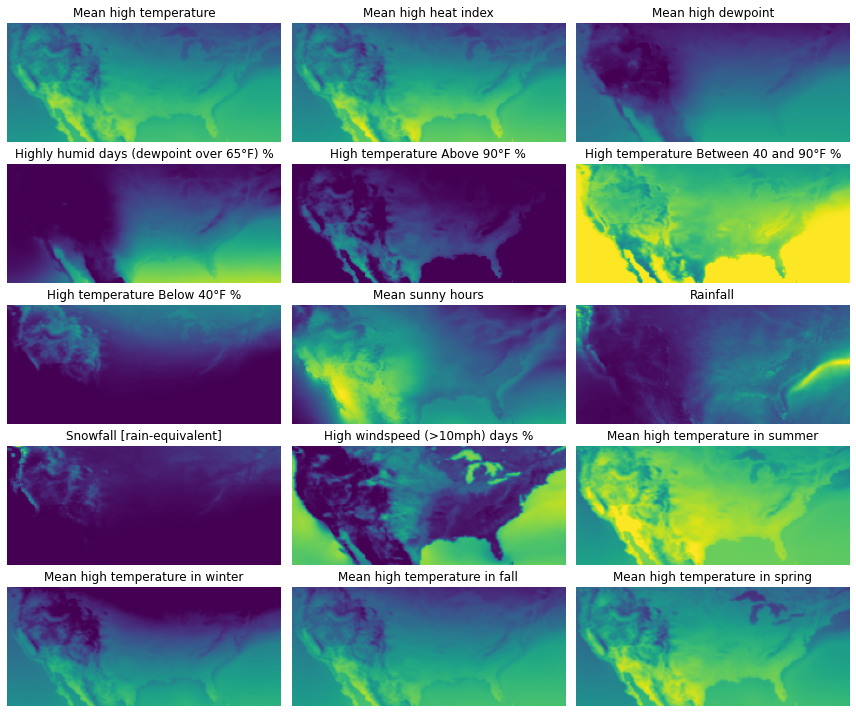

In [7]:
matr = cstats["continental_us"]
rows, cols = 5, 3
width, height = 4, 2
assert len(statistics) <= rows * cols
_, axs = plt.subplots(rows, cols, figsize=(cols * width, rows * height), tight_layout=True, facecolor="white")
for ax, statname in zip(axs.flatten(), statistics):
    stat = statistics[statname]
    if "%" in stat.display_name:
        clim = (0, 100)
    elif "high" in stat.display_name.lower():
        clim = (30, 100)
    else:
        print(statname)
        clim = None
    ax.imshow(matr[statname], clim=clim)
    ax.set_title(stat.display_name)
for ax in axs.flatten():
    ax.axis("off")

In [44]:
matr["days_between_40_and_90"]

array([[ 90.95890411,  93.15068493,  92.87671233, ...,  58.35616438,
         54.24657534,  55.61643836],
       [ 89.8630137 ,  88.76712329,  90.95890411, ...,  50.68493151,
         52.60273973,  56.43835616],
       [ 85.47945205,  78.90410959,  83.28767123, ...,  53.42465753,
         54.79452055,  61.36986301],
       ...,
       [100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ]])

In [30]:
statistics["mean_high_temp_winter"].compute(dates, res["continental_us"])

array([[287.9211 , 287.39108, 286.13858, ..., 281.66068, 279.9444 ,
        279.8075 ],
       [287.37656, 287.69696, 286.52765, ..., 279.46014, 279.8982 ,
        280.4831 ],
       [286.41858, 286.73935, 287.2635 , ..., 280.27222, 280.5538 ,
        283.18195],
       ...,
       [290.59586, 290.57098, 290.51913, ..., 298.27362, 298.24823,
        298.2198 ],
       [290.71   , 290.67825, 290.62985, ..., 298.32266, 298.292  ,
        298.2721 ],
       [290.83533, 290.80524, 290.74045, ..., 298.3707 , 298.34604,
        298.3121 ]], dtype=float32)

In [57]:
import matplotlib.pyplot as plt

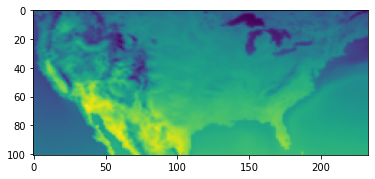

In [61]:
plt.imshow()

In [39]:
res["continental_us"]["wind_speed"].shape

(365, 101, 233)

In [214]:
ds.longitude - (-178.334698)

<xarray.DataArray 'longitude' (longitude: 95)>
array([359.999992  , 360.24999201, 360.49999202, 360.74999203,
       360.99999204, 361.24999205, 361.49999206, 361.74999207,
       361.99999209, 362.2499921 , 362.49999211, 362.74999212,
       362.99999213, 363.24999214, 363.49999215, 363.74999216,
       363.99999217, 364.24999218, 364.49999219, 364.7499922 ,
       364.99999221, 365.24999222, 365.49999223, 365.74999224,
       365.99999226, 366.24999227, 366.49999228, 366.74999229,
       366.9999923 , 367.24999231, 367.49999232, 367.74999233,
       367.99999234, 368.24999235, 368.49999236, 368.74999237,
       368.99999238, 369.24999239, 369.4999924 , 369.74999241,
       369.99999243, 370.24999244, 370.49999245, 370.74999246,
       370.99999247, 371.24999248, 371.49999249, 371.7499925 ,
       371.99999251, 372.24999252, 372.49999253, 372.74999254,
       372.99999255, 373.24999256, 373.49999257, 373.74999259,
       373.9999926 , 374.24999261, 374.49999262, 374.74999263,
       374.99999264, 375.24999265, 375.49999266, 375.74999267,
       375.99999268, 376.24999269, 376.4999927 , 376.74999271,
       376.99999272, 377.24999273, 377.49999274, 377.74999276,
       377.99999277, 378.24999278, 378.49999279, 378.7499928 ,
       378.99999281, 379.24999282, 379.49999283, 379.74999284,
       379.99999285, 380.24999286, 380.49999287, 380.74999288,
       380.99999289, 381.2499929 , 381.49999291, 381.74999293,
       381.99999294, 382.24999295, 382.49999296, 382.74999297,
       382.99999298, 383.24999299, 383.499993  ])
Coordinates:
    step       timedelta64[ns] 12:00:00
    surface    int64 0
  * longitude  (longitude) float64 181.7 181.9 182.2 182.4 ... 204.7 204.9 205.2

In [198]:
stats_all = {k : np.concatenate([res[k] for res in results]) for k in results[0]}

In [200]:
stats_all["t2m_max"].shape

(365, 100, 232)

In [202]:
24.521304 + 99 * 0.25

49.271304

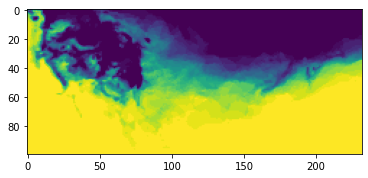

In [101]:
plt.imshow((s["t2m_max"] > 280).mean(0))

In [3]:
! du -sh download.grib

166M	download.grib


In [4]:
import xarray as xr

In [134]:
variables = [
    #                 "10m_u_component_of_wind",
    #                 "10m_v_component_of_wind",
    #                 "2m_dewpoint_temperature",
    #                 "2m_temperature",
#     "precipitation_type",
    "total_precipitation",
    #                 "total_cloud_cover",
]

In [151]:
query(hawaii, month=["01"], year="2021", variables=["precipitation_type"], path="download.grib", time=["06:00", "18:00"])
ds = xr.load_dataset("download.grib")#, backend_kwargs={'filter_by_keys': {'shortName': 'cdir'}})

2023-09-15 15:40:22,306 INFO Welcome to the CDS
2023-09-15 15:40:22,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-15 15:40:22,575 INFO Request is completed
2023-09-15 15:40:22,576 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data8/adaptor.mars.internal-1694813372.627307-5687-13-b8d9f496-c9fa-4105-a95d-b2faf065a477.grib to download.grib (450.5K)
2023-09-15 15:40:23,650 INFO Download rate 419.8K/s
Ignoring index file '/home/kavi/census-centroid-blocks/population_density/download.grib.90c91.idx' older than GRIB file


AttributeError: 'Dataset' object has no attribute 'tp'

In [ ]:
ds = xr.load_dataset("download.grib")#, backend_kwargs={'filter_by_keys': {'shortName': 'cdir'}})

In [154]:
ds.ptype

<xarray.DataArray 'ptype' (time: 62, latitude: 38, longitude: 95)>
array([[[1., 1., 1., ..., 0., 1., 1.],
        [0., 0., 1., ..., 0., 1., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 0., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 0., 1., 1.]],

       [[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
...
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 0., 1., 0.]],

       [[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)
Coordinates:
  * time        (time) datetime64[ns] 2020-12-31T18:00:00 ... 2021-01-31T06:0...
    step        timedelta64[ns] 12:00:00
    surface     int64 0
  * latitude    (latitude) float64 28.16 27.91 27.66 27.41 ... 19.41 19.16 18.91
  * longitude   (longitude) float64 181.7 181.9 182.2 ... 204.7 204.9 205.2
    valid_time  (time) datetime64[ns] 2021-01-01T06:00:00 ... 2021-01-31T18:0...
Attributes:
    GRIB_paramId:                             260015
    GRIB_shortName:                           ptype
    GRIB_units:                               code table (4.201)
    GRIB_name:                                Precipitation type
    GRIB_cfVarName:                           ptype
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      3610
    GRIB_typeOfLevel:                         surface
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/longitude 
    GRIB_Nx:                                  95
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  181.665294
    GRIB_longitudeOfLastGridPointInDegrees:   205.165295
    GRIB_Ny:                                  38
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   28.160356
    GRIB_latitudeOfLastGridPointInDegrees:    18.910356
    long_name:                                Precipitation type
    units:                                    code table (4.201)

(62, 38, 95)

In [75]:
main_statistics(ds)

{'wind_speed': array([[[ 3.2453556,  3.8299916,  6.3833866, ...,  7.159554 ,
           8.495677 ,  8.208784 ],
         [ 2.8804405,  2.5576751,  2.7930415, ...,  8.147126 ,
           7.9352136,  7.475496 ],
         [ 5.6194572,  4.106271 ,  2.763732 , ...,  5.310943 ,
           4.9380655,  4.6044774],
         ...,
         [ 7.9109497,  7.951769 ,  7.9949765, ...,  8.728123 ,
           8.776347 ,  8.823432 ],
         [ 7.903383 ,  7.939583 ,  7.977881 , ...,  8.879148 ,
           8.937249 ,  8.991381 ],
         [ 7.8534007,  7.902721 ,  7.943773 , ...,  9.022571 ,
           9.043996 ,  9.107681 ]],
 
        [[ 3.9189262,  4.1861024,  5.0282226, ...,  4.3001723,
           4.9586096,  4.574939 ],
         [ 4.8287635,  4.7867618,  4.397652 , ...,  4.1009793,
           3.6561918,  3.204464 ],
         [ 6.861202 ,  6.243986 ,  5.5709558, ...,  2.1609597,
           2.0066454,  1.9303774],
         ...,
         [ 6.3669524,  6.3080673,  6.257078 , ...,  6.2827067,
          

In [6]:
232 * 100 * 30 * 365 / 1e9

0.25404

In [7]:
import pandas as pd

In [8]:
import numpy as np
import matplotlib.pyplot as plt

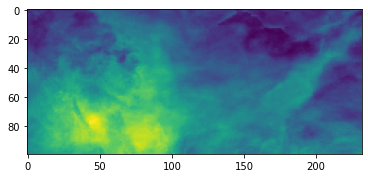

In [72]:
plt.imshow(stats["non_cloudy_sunny_pct"].mean(0))

(array([310934.,  48973.,  41196.,  38095.,  35546.,  34669.,  33153.,
         36958.,  57385.,  82291.]),
 array([0.        , 0.04546975, 0.0909395 , 0.13640925, 0.181879  ,
        0.22734875, 0.2728185 , 0.31828825, 0.363758  , 0.40922776,
        0.45469751]),
 <BarContainer object of 10 artists>)

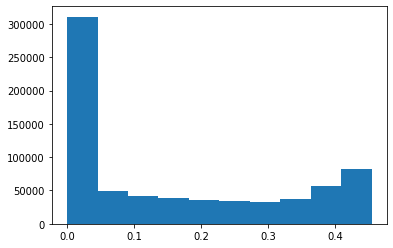

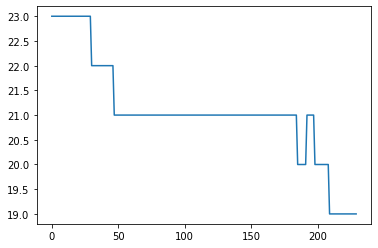

In [10]:
plt.plot(temps["t2m"].mean((0, 2)).argmax(0)[2:])

In [11]:
import suncalc

In [12]:
from datetime import datetime, time, timedelta

In [13]:
np.array(ds.time).dtype

dtype('<M8[ns]')

In [32]:
from urbanstats.weather.era5 import light

In [17]:
date = np.array(ds.time)

In [29]:
from permacache import stable_hash

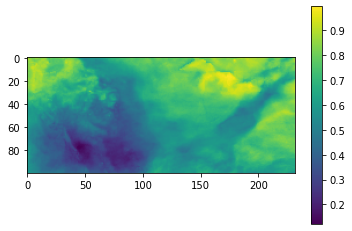

In [50]:
plt.imshow(cloudy.mean(1).mean(0))
plt.colorbar()

In [ ]:
times = suncalc.get_times(date.flatten(), lon.flatten(), lat.flatten())
# times = {k : np.array().reshape(ndate, nlat, nlon) for k in ["sunrise", "sunset"]}

In [666]:
d = times["sunrise"][0].time()

In [667]:
((d.second/60 + d.minute) / 60 + d.hour) / 24

0.6774768518518518

In [658]:
d

datetime.time(16, 15, 34, 928490)

In [628]:
day_length = times["sunset"] - times["sunrise"]

In [631]:
day_length[0]

array([[Timedelta('0 days 08:15:49.784883712'),
        Timedelta('0 days 08:15:49.744570368'),
        Timedelta('0 days 08:15:49.704176384'), ...,
        Timedelta('0 days 08:15:40.604487168'),
        Timedelta('0 days 08:15:40.564656384'),
        Timedelta('0 days 08:15:40.524905728')],
       [Timedelta('0 days 08:18:00.953273088'),
        Timedelta('0 days 08:18:00.913361920'),
        Timedelta('0 days 08:18:00.873450752'), ...,
        Timedelta('0 days 08:17:51.876677888'),
        Timedelta('0 days 08:17:51.837329920'),
        Timedelta('0 days 08:17:51.797981952')],
       [Timedelta('0 days 08:20:10.501232896'),
        Timedelta('0 days 08:20:10.461723904'),
        Timedelta('0 days 08:20:10.422214912'), ...,
        Timedelta('0 days 08:20:01.526588160'),
        Timedelta('0 days 08:20:01.487723264'),
        Timedelta('0 days 08:20:01.448777472')],
       ...,
       [Timedelta('0 days 10:36:31.686308352'),
        Timedelta('0 days 10:36:31.671824384'),
        Ti

TypeError: Image data of dtype object cannot be converted to float

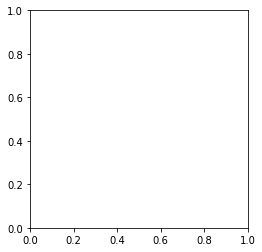

In [630]:
plt.imshow(day_length[0])

In [607]:
date[-1][-1][-1]

numpy.datetime64('2021-01-31T00:00:00.000000000')

In [608]:
lat[-1][-1][-1]

24.522

In [609]:
lon[-1][-1][-1]

-67.01300000000056

In [610]:
suncalc.get_times

<function suncalc.suncalc.get_times(date, lng, lat, height=0, times: Iterable[Tuple[float, str, str]] = [(-0.833, 'sunrise', 'sunset'), (-0.3, 'sunrise_end', 'sunset_start'), (-6, 'dawn', 'dusk'), (-12, 'nautical_dawn', 'nautical_dusk'), (-18, 'night_end', 'night'), (6, 'golden_hour_end', 'golden_hour')])>

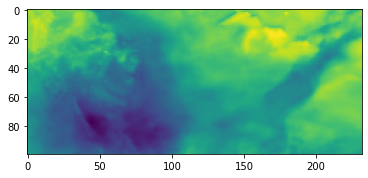

In [515]:
plt.imshow(.mean(0))

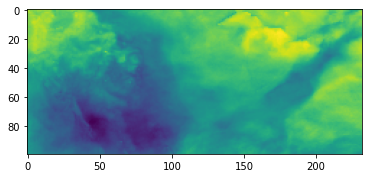

In [529]:
plt.imshow((cloud_cover >= 0.5).mean((0, 1)))

array([['2021-01-01T00:00:00.000000000', '2021-01-01T01:00:00.000000000',
        '2021-01-01T02:00:00.000000000', '2021-01-01T03:00:00.000000000',
        '2021-01-01T04:00:00.000000000', '2021-01-01T05:00:00.000000000',
        '2021-01-01T06:00:00.000000000', '2021-01-01T07:00:00.000000000',
        '2021-01-01T08:00:00.000000000', '2021-01-01T09:00:00.000000000',
        '2021-01-01T10:00:00.000000000', '2021-01-01T11:00:00.000000000',
        '2021-01-01T12:00:00.000000000', '2021-01-01T13:00:00.000000000',
        '2021-01-01T14:00:00.000000000', '2021-01-01T15:00:00.000000000',
        '2021-01-01T16:00:00.000000000', '2021-01-01T17:00:00.000000000',
        '2021-01-01T18:00:00.000000000', '2021-01-01T19:00:00.000000000',
        '2021-01-01T20:00:00.000000000', '2021-01-01T21:00:00.000000000',
        '2021-01-01T22:00:00.000000000', '2021-01-01T23:00:00.000000000'],
       ['2021-01-02T00:00:00.000000000', '2021-01-02T01:00:00.000000000',
        '2021-01-02T02:00:00.00000000

In [433]:
wind_speed

(744, 100, 232)

In [423]:
assert len(ds.time) % 24 == 0
ds.time

<xarray.DataArray 'time' (time: 744)>
array(['2021-01-01T00:00:00.000000000', '2021-01-01T01:00:00.000000000',
       '2021-01-01T02:00:00.000000000', ..., '2021-01-31T21:00:00.000000000',
       '2021-01-31T22:00:00.000000000', '2021-01-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     int64 0
    valid_time  (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [369]:
# plt.hist(np.array(ds.ptype).flatten())

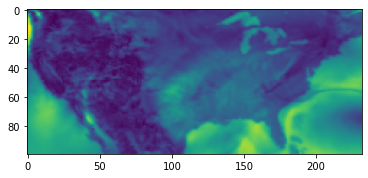

In [382]:
plt.imshow(np.array((ds.v10 ** 2 + ds.u10 ** 2) ** 0.5).mean(0))

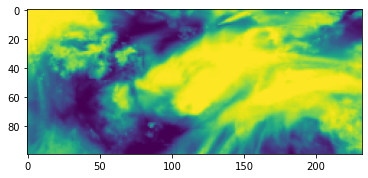

In [372]:
plt.imshow(np.array(ds.tcc).mean(0))

In [371]:
plt.imshow(np.array(ds.ptype)[1])

AttributeError: 'Dataset' object has no attribute 'ptype'

In [317]:
import matplotlib.pyplot as plt

In [350]:
ds

<xarray.Dataset>
Dimensions:     (time: 2, latitude: 100, longitude: 232)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2021-01-01T06:00:00 2021-01-01T18:00:00
    step        timedelta64[ns] 00:00:00
    surface     int64 0
  * latitude    (latitude) float64 49.27 49.02 48.77 48.52 ... 25.02 24.77 24.52
  * longitude   (longitude) float64 -124.8 -124.5 -124.3 ... -67.26 -67.01
    valid_time  (time) datetime64[ns] 2021-01-01T06:00:00 2021-01-01T18:00:00
Data variables:
    tcc         (time, latitude, longitude) float32 1.0 1.0 ... 0.4514 0.4047
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-14T22:24:55 GRIB to CDM+CF via cfgrib-0....

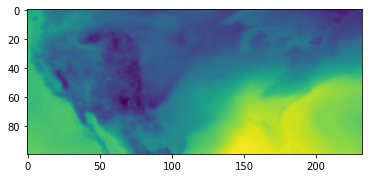

In [228]:
plt.imshow(np.array(ds.d2m).mean(0))

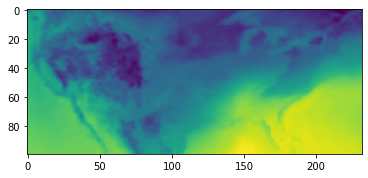

In [229]:
plt.imshow(np.array(ds.t2m).mean(0))

In [ ]:
# daily high: TMAX [tenths of degree C]
# average cloudiness % ACSC or ACSH
# daily sunshine TSUN min
# precipitation PRCP [tenths of mm]
# snow SNOW [tenths of mm]
# dew point ADPT
# mean wind speed 

In [17]:
import pandas as pd
import requests

In [18]:
from datetime import datetime
from dateutil import rrule


In [19]:
year = 2019
dates = [
    x
    for x in rrule.rrule(
        rrule.DAILY, dtstart=datetime(year, 1, 1), until=datetime(year + 1, 1, 1)
    )
][:-1]

In [20]:
stations = pd.DataFrame(
    [
        x.split()[:4]
        for x in requests.get(
            "https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"
        )
        .content.decode("utf-8")
        .split("\n")
    ],
    columns=["name", "lat", "lon", "elev"],
)

In [21]:
date_to_idx = {datetime.strftime(x, "%Y%m%d") : i for i, x in enumerate(dates)}
daily_data = {name : {
    col : np.zeros(len(dates)) + np.nan for col in ["TMAX", "ACSC", "PRCP", "SNOW", "ADPT"]
    for col in ["TMAX", "ACSC", "PRCP", "SNOW", "ADPT"]
} for name in stations.name}

In [48]:
url = "https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_year/2019.csv.gz"
gz_data = requests.get(url).content
csv_data = gzip.decompress(gz_data)
csv_data = csv_data.decode("ascii")

In [46]:
for row in csv.reader(io.StringIO(csv_data)):
    daily_data[row[0]][row[2]][date_to_idx[row[1]]] = int(row[3])

['AE000041196', '20190101', 'TMAX', '269', '', '', 'S', '']

In [52]:
from urbanstats.games.quiz import sample_quiz, stats_to_display, generate_quizzes

In [30]:
from permacache import stable_hash

In [45]:
! mkdir "/home/kavi/temp/site/quiz"

In [67]:
generate_quizzes("/home/kavi/temp/site/quiz/")

  0%|          | 0/1091 [00:00<?, ?it/s]

In [20]:
for s, a, b, sa, sb in results:
    print(f"Which has a {stats_to_display[s].lower()}?")
    print(f" a) {a}")
    print(f" b) {b}")
    print(f"Answer: || {'a' if sa > sb else 'b'} ||")
    print()

[autoreload of urbanstats.games.quiz failed: Traceback (most recent call last):
  File "/home/kavi/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/kavi/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/kavi/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/kavi/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/kavi/census-cen

ValueError: too many values to unpack (expected 5)

In [7]:
results = [['Hawaiian / PI %',
            'Lexington-Fayette MSA, KY, USA',
            'Reno MSA, NV, USA',
            0.00040823117880138684,
            0.006640902086441797],
        ['Only English at Home %',
            'Beaumont-Port Arthur MSA, TX, USA',
            'Bakersfield MSA, CA, USA',
            0.8399036567131073,
            0.5564976632710499],
        ['AW Density',
            'Durham city, North Carolina, USA',
            'San Juan zona urbana, Puerto Rico, USA',
            943.706320123608,
            3018.1410081438416],
        ['Non-citizen %',
            'Essex County, Massachusetts, USA',
            'Hamilton County, Ohio, USA',
            0.07936114432335212,
            0.032050460213597164],
        ['High School %',
            'Cumberland County, Maine, USA',
            'Pierce County, Washington, USA',
            0.957963954841063,
            0.9241018363910174]]

In [9]:
[dict(zip(["question", "longname_a", "longname_b", "stat_a", "stat_b"], x)) for x in results]

[{'question': 'Hawaiian / PI %',
  'longname_a': 'Lexington-Fayette MSA, KY, USA',
  'longname_b': 'Reno MSA, NV, USA',
  'stat_a': 0.00040823117880138684,
  'stat_b': 0.006640902086441797},
 {'question': 'Only English at Home %',
  'longname_a': 'Beaumont-Port Arthur MSA, TX, USA',
  'longname_b': 'Bakersfield MSA, CA, USA',
  'stat_a': 0.8399036567131073,
  'stat_b': 0.5564976632710499},
 {'question': 'AW Density',
  'longname_a': 'Durham city, North Carolina, USA',
  'longname_b': 'San Juan zona urbana, Puerto Rico, USA',
  'stat_a': 943.706320123608,
  'stat_b': 3018.1410081438416},
 {'question': 'Non-citizen %',
  'longname_a': 'Essex County, Massachusetts, USA',
  'longname_b': 'Hamilton County, Ohio, USA',
  'stat_a': 0.07936114432335212,
  'stat_b': 0.032050460213597164},
 {'question': 'High School %',
  'longname_a': 'Cumberland County, Maine, USA',
  'longname_b': 'Pierce County, Washington, USA',
  'stat_a': 0.957963954841063,
  'stat_b': 0.9241018363910174}]

In [125]:
{x : f"Higher {x}" for x in stats}

{'Population': 'Higher Population',
 'PW Density (r=1km)': 'Higher PW Density (r=1km)',
 'AW Density': 'Higher AW Density',
 'Area': 'Higher Area',
 'White %': 'Higher White %',
 'Hispanic %': 'Higher Hispanic %',
 'Black %': 'Higher Black %',
 'Asian %': 'Higher Asian %',
 'Native %': 'Higher Native %',
 'Hawaiian / PI %': 'Higher Hawaiian / PI %',
 'Citizen by Birth %': 'Higher Citizen by Birth %',
 'Citizen by Naturalization %': 'Higher Citizen by Naturalization %',
 'Non-citizen %': 'Higher Non-citizen %',
 'Born outside US %': 'Higher Born outside US %',
 'Born in us outside state %': 'Higher Born in us outside state %',
 'Born in state of residence %': 'Higher Born in state of residence %',
 'Only English at Home %': 'Higher Only English at Home %',
 'Spanish at Home %': 'Higher Spanish at Home %',
 'High School %': 'Higher High School %',
 'Undergrad %': 'Higher Undergrad %',
 'Grad %': 'Higher Grad %',
 'Undergrad STEM %': 'Higher Undergrad STEM %',
 'Undergrad Humanities %': '

In [119]:
["left" if a > b else "right" for *_, a, b in results]

['right', 'left', 'right', 'left', 'left']

In [77]:
a, b

('Albuquerque [Urban Area], NM, USA', 'Jacksonville [Urban Area], FL, USA')

In [78]:
stat_a, stat_b

(0.008817136269151886, 0.006007043934968361)

['Commute Bike %',
 'Albuquerque [Urban Area], NM, USA',
 'Jacksonville [Urban Area], FL, USA']

In [90]:
stat_a > stat_b

True

In [79]:
statistic_keys = sorted(get_statistic_names(), key=str)

In [80]:
cities

,longname,shortname,population,hispanic,white,black,native,asian,hawaiian_pi,ad_0.25,...,"(insurance_coverage_none, overall_ordinal)","(insurance_coverage_govt, overall_ordinal)","(insurance_coverage_private, overall_ordinal)","(marriage_never_married, overall_ordinal)","(marriage_married_not_divorced, overall_ordinal)","(marriage_divorced, overall_ordinal)","(ad_0.25, overall_ordinal)","(ad_0.5, overall_ordinal)","(ad_2, overall_ordinal)","(ad_4, overall_ordinal)"
113483,"California, USA",California,39531994.0,0.394079,0.346821,0.053599,0.003948,0.151228,0.003494,4558.306134,...,76958,50200,90013,28804,116013,108933,7333,6656,7114,7650
113515,"Texas, USA",Texas,29143938.0,0.392573,0.397465,0.118196,0.002931,0.053579,0.000956,2730.914589,...,13733,127117,93877,45630,100706,90020,20414,23691,25664,25557
113526,"Florida, USA",Florida,21535757.0,0.264529,0.515359,0.145201,0.001958,0.029234,0.000535,3109.861148,...,27104,102330,88548,54233,105475,48482,15900,21428,23499,23690
113495,"New York, USA",New York,20200470.0,0.195436,0.524659,0.136580,0.002718,0.094865,0.000302,12399.512154,...,105336,40711,87395,26059,119477,111142,1285,1211,1286,1272
113488,"Pennsylvania, USA",Pennsylvania,13002739.0,0.080723,0.734724,0.105284,0.001156,0.038967,0.000243,2906.283434,...,105086,68149,62304,41482,102388,99286,18120,16155,17860,19577
113501,"Illinois, USA",Illinois,12810530.0,0.182447,0.583242,0.138591,0.001293,0.058300,0.000231,3680.300427,...,77715,82833,63083,34884,110826,99656,11295,9201,10202,10485
113516,"Ohio, USA",Ohio,11798637.0,0.044182,0.758860,0.123497,0.001606,0.025135,0.000381,1898.413791,...,91571,59409,75319,46143,108754,62150,37783,36190,35257,35056
113486,"Georgia, USA",Georgia,10711705.0,0.104881,0.500570,0.306031,0.001902,0.044407,0.000570,2193.262316,...,27986,111635,81375,37529,114194,75136,30175,43997,41278,38627
113520,"North Carolina, USA",North Carolina,10438387.0,0.107159,0.604616,0.201901,0.009665,0.032577,0.000669,1674.157811,...,39889,96752,78948,49290,99311,81731,44246,52752,48387,44994
113524,"Michigan, USA",Michigan,10075930.0,0.056014,0.723942,0.134822,0.004699,0.032978,0.000258,1785.992202,...,105119,49332,79228,42723,110911,66595,40924,37421,34928,33662


In [55]:
rng = np.random.RandomState(0)
statistics = [statistic_keys[i] for i in rng.choice(len(statistic_names), size=16, replace=False)]
which = [0, 1, 2, 3] * 4
while True:
    geo_idxs = rng.choice(cities.shape[0], size=4, replace=False)
    percentile_by_pop_matrix = cities.iloc[geo_idxs][[(x, "percentile_by_population") for x in statistics]]
    percentile_by_pop_matrix = np.array(percentile_by_pop_matrix)
    chosen_stat = percentile_by_pop_matrix[which, np.arange(16)]
    close = (np.abs(percentile_by_pop_matrix - chosen_stat) < 0.05).sum()
    print(close)
    if close == 16:
        break

21
22
29
31
23
31
32
29
22
24
25
31
28
28
28
25
26
25
27
24
25
31
26
25
21
26
26
23
20
31
28
19
17
23
24
27
33
26
27
28
24
22
19
25
24
31
30
24
30
30
22
31
23
21
24
27
29
27
25
23
32
26
35
25
24
28
25
23
22
28
26
20
29
22
24
29
19
21
23
23
26
33
28
28
28
27
28
31
23
22
26
22
26
29
23
23
20
34
27
24
21
26
23
24
23
26
27
30
20
20
30
19
27
22
31
26
27
25
28
24
28
27
19
18
21
28
23
23
22
25
25
23
31
31
27
25
24
25
26
29
23
22
21
30
21
26
27
22
25
35
21
27
32
29
23
33
32
20
26
22
27
25
35
25
24
21
30
30
23
35
28
24
25
22
27
20
21
28
29
19
31
27
22
29
33
20
24
23
28
26
19
28
21
22
23
24
23
21
28
24
31
29
21
21
24
29
22
24
28
25
26
30
26
28
28
26
24
31
28
23
30
25
38
21
20
23
26
19
22
26
29
27
23
28
30
23
23
27
32
24
22
25
23
35
21
22
33
23
21
24
24
27
26
20
25
24
31
22
28
24
26
25
26
24
28
21
27
26
21
33
30
26
23
31
25
18
23
21
22
20
24
20
26
23
33
26
31
28
20
27
26
22
26
30
22
21
24
34
28
26
32
20
21
20
30
28
28
22
24
20
31
23
27
21
28
29
26
32
25
25
29
30
24
23
30
30
31
24
28
23
21
26
27
2

In [67]:
def render_stat(name, val):
    return f"{name:30s} {val:20.4f}"

statistics_by_city = {}
for i in range(4):
    row = cities.iloc[geo_idxs[i]]
    s = []
    for j in range(16):
        if which[j] == i:
            s.append(render_stat(get_statistic_names()[statistics[j]], row[statistics[j]]))
    statistics_by_city[row.longname] = s

In [69]:
for k in statistics_by_city:
    print(k)
    for v in statistics_by_city[k]:
        print("    ", v)

Mountainside borough, New Jersey, USA
     Poverty %                                    0.0230
     Never Married %                              0.1875
     Population                                7020.0000
     PW Density (r=250m)                       1182.6364
Anderson city, Missouri, USA
     Hawaiian / PI %                              0.0636
     Commute Work From Home %                     0.0307
     Rent/Income > 40%                            0.1882
     Vacancy %                                    0.1122
Louin town, Mississippi, USA
     Household Income > $100k %                   0.0456
     % units built in 1970s                       0.2405
     Only English at Home %                       0.9996
     Rent/Income 20%-40%                          1.0000
Kalamazoo city, Michigan, USA
     Commute Time > 60 min %                      0.0283
     % units built in 1990s                       0.0687
     Commute Time 30 - 59 min %                   0.1178
     Individual Inc

In [75]:
question = [v for vs in statistics_by_city.values() for v in vs]
rng.shuffle(question)
print("\n".join(statistics_by_city.keys()))
print()
print("\n".join(question))

Mountainside borough, New Jersey, USA
Anderson city, Missouri, USA
Louin town, Mississippi, USA
Kalamazoo city, Michigan, USA

Hawaiian / PI %                              0.0636
Poverty %                                    0.0230
Never Married %                              0.1875
% units built in 1970s                       0.2405
Rent/Income > 40%                            0.1882
Commute Work From Home %                     0.0307
Vacancy %                                    0.1122
Commute Time 30 - 59 min %                   0.1178
Only English at Home %                       0.9996
% units built in 1990s                       0.0687
PW Density (r=250m)                       1182.6364
Commute Time > 60 min %                      0.0283
Household Income > $100k %                   0.0456
Rent/Income 20%-40%                          1.0000
Population                                7020.0000
Individual Income > $100k %                  0.0525


In [10]:
cities.iloc[selection]

,longname,shortname,population,hispanic,white,black,native,asian,hawaiian_pi,ad_0.25,...,"(insurance_coverage_none, overall_ordinal)","(insurance_coverage_govt, overall_ordinal)","(insurance_coverage_private, overall_ordinal)","(marriage_never_married, overall_ordinal)","(marriage_married_not_divorced, overall_ordinal)","(marriage_divorced, overall_ordinal)","(ad_0.25, overall_ordinal)","(ad_0.5, overall_ordinal)","(ad_2, overall_ordinal)","(ad_4, overall_ordinal)"
58560,"Dyer town, Indiana, USA",Dyer town,16533.0,0.136152,0.757515,0.035989,0.000847,0.038710,0.000060,1622.257353,...,113569,114341,28661,95410,46184,108126,45837,38789,36751,34246
43360,"Gap CDP, Pennsylvania, USA",Gap CDP,2186.0,0.049405,0.881061,0.029277,0.000457,0.011436,0.000000,993.504274,...,3273,85845,139238,63681,69966,114283,69657,75807,72512,70432
52224,"Dillsburg borough, Pennsylvania, USA",Dillsburg borough,2596.0,0.041602,0.881356,0.012327,0.000000,0.023498,0.001541,1568.811609,...,125586,93709,36668,77712,122119,4896,47518,37139,54530,59248
42910,"Cowiche CDP, Washington, USA",Cowiche CDP,535.0,0.702804,0.244860,0.000000,0.005607,0.001869,0.000000,578.455334,...,13324,29575,141832,77037,115725,8307,92794,99846,92636,90677


In [8]:
folder = '/home/kavi/temp/site/'

In [9]:
create_page_json(
    f"{folder}/data",
    u,
    relationships,
    long_to_short,
    long_to_pop,
    long_to_type,
)

NameError: name 'create_page_json' is not defined

In [ ]:
a = data_files_pb2.Article()

In [ ]:
"""
get rid of forward and backward buttons
1	r/
1	styles/
8	index/
16	scripts/
609	order/
2884	data/
3770	shape/
7285	total

clean up shapefiles
1	r/
1	styles/
8	index/
16	scripts/
609	order/
2641	shape/
2884	data/
6156	total

remove name from data
8       index
16      scripts
609     order
2628    data
2641    shape
5901    total

use gzipped protobufs for data
8       index
28      scripts
609     order
643     data
2648    shape
3933    total

add a bunch of acs rows
8       index
28      scripts
648     data
932     order
2648    shape
4261    total

use gzipped protobufs for shape
8       index
28      scripts
648     data
932     order
949     shape
2562    total

use gzipped protobufs for order
2       scripts
3       index
193     order
648     data
949     shape
1793    total

add in shapefiles for media markets, urban areas, judicial districts
2       scripts
3       index
198     order
664     data
1006    shape
1872    total
"""
None

In [ ]:
with open("/home/kavi/temp/site/shape/Fairfax County, Virginia, USA.json") as f:
    fc_python = json.load(f)

In [ ]:
from urbanstats.protobuf import data_files_pb2

In [ ]:
from output_geometry import convert_to_protobuf

In [ ]:
fc = convert_to_protobuf(fc_python)

In [ ]:
import gzip

In [ ]:
with gzip.open(f"/home/kavi/temp/site/shape/Fairfax County, Virginia, USA.gz", "wb") as f:
    f.write(fc.SerializeToString())

In [ ]:
fc_2 = data_files_pb2.FeatureCollection()
with gzip.open("/home/kavi/temp/site/shape/Fairfax County, Virginia, USA.gz", "rb") a sf:
    fc_2.

In [ ]:
! du -sb ~/temp.gz

In [ ]:
len(json.dumps(fc_python))

In [ ]:
ring_python

In [ ]:
f.

In [ ]:
x[0]["coordinates"]

In [ ]:
for i in tqdm.trange(full.shape[0], desc="creating pages"):
    row = full.iloc[i]
#     if row["type"] != "State":
#         continue
    create_page_json(
        f"{folder}/data",
        row,
        relationships,
        long_to_short,
        long_to_pop,
        long_to_type,
    )


In [ ]:
# get_acs_data(entities["aggregate_rent"]).sum()

In [ ]:
sf = shapefiles["states"]

In [ ]:
x = sf.load_file().to_crs({"proj": "cea"})

In [ ]:
area = x.geometry.area
perimiter = x.geometry.length
x["compactness"] = 4 * np.pi * area / perimiter ** 2

In [ ]:
x[["shortname", "compactness"]].sort_values("compactness")

In [ ]:
x.sort_values("education_field_humanities")

In [ ]:
x.education_field_humanities

In [ ]:
y = with_acs_data()

In [ ]:
y[y.geoid.apply(lambda x: "US28" in x)].education_field_humanities.sum()

In [ ]:
import pickle
len(pickle.dumps(with_acs_data()))

In [ ]:
sorted(
    set(
        [
            v["concept"]
            for v in acs_variables().values()
            if "$10,000" in v["label"]
            if "HOUSEHOLD" not in v["concept"]
            and "FAMILY" not in v["concept"]
            and "INC" in v["concept"]
        ]
    )
)

In [ ]:
var_for_concept = for_concept(
    
)

In [ ]:
data = with_election_results()

In [ ]:
var_for_concept

In [ ]:
universe_for_disagg = "population_18"

In [ ]:
%time 

In [ ]:
acs_data

In [ ]:
data[universe_for_disagg]

In [ ]:
result.state + result.county + result.tract

In [ ]:
list(x)

In [ ]:
key = ("2020 Presidential Election", "margin")

In [ ]:
y = shapefile_without_ordinals()

In [ ]:
y_n = add_ordinals(y[y.type == "Neighborhood"])

In [ ]:
y_n.loc[
    [
        1564,
        3907,
        302,
        4009,
        3464,
        1712,
        3166,
        3457,
        3568,
        5871,
        5886,
        1871,
        3757,
        3454,
        1635,
        1337,
        3027,
        2704,
        406,
        5623,
        4024,
        3906,
        1429,
        6049,
        108,
        643,
        612,
        596,
        599,
        5477,
        1924,
        3408,
        3169,
        2273,
        2164,
        598,
        5822,
        1679,
        3500,
        3527,
        2414,
        4397,
        4312,
        4106,
        6055,
        5466,
        2363,
        1804,
        1723,
        4027,
        1591,
        1764,
        4627,
        3465,
        3800,
        3663,
        1376,
        1705,
        5395,
        98,
        2064,
        2065,
        2848,
        1916,
        6129,
        1610,
        3967,
        2409,
        3575,
        396,
        3963,
        1834,
        1664,
        1614,
        5805,
        1543,
        3997,
        5015,
        3998,
        2293,
        3565,
        2682,
        2413,
        3000,
        2511,
        1661,
        1620,
        5614,
        2415,
        2869,
        3146,
        1631,
        1806,
        3026,
        2463,
        5641,
        6031,
        1791,
        1879,
        4507,
        404,
        1450,
        1381,
        1740,
        2747,
        4127,
        1346,
        4502,
        79,
        1417,
        1462,
        1460,
        1681,
        2042,
        1745,
        1897,
        1981,
        1983,
        3479,
        3528,
        5449,
        5450,
        5447,
        4538,
        1410,
        5710,
        398,
        1741,
        1926,
        4109,
        1847,
        4047,
        3452,
        3210,
        2555,
        3566,
        4869,
        5271,
        5115,
        6107,
        3165,
        2205,
        5467,
        1259,
        4247,
        1785,
        4048,
        4734,
        3917,
        1807,
        3458,
        679,
        3901,
        2400,
        5265,
        3376,
        3022,
        2082,
        5637,
        2148,
        301,
        5476,
        1633,
        5456,
        2683,
        6087,
        3333,
        2833,
        4981,
        310,
        2637,
        5680,
        5693,
        5712,
        1997,
        3504,
        4691,
        3661,
        3571,
        5707,
        5475,
        4919,
        3047,
        3306,
        2037,
        4294,
        1387,
        6027,
        3764,
        2436,
        1683,
        5458,
        5470,
        5685,
        6025,
        3383,
        3572,
        1853,
        2298,
        4530,
        6083,
        3921,
        1312,
        2286,
        6137,
        5713,
        3797,
        5000,
        5287,
        5499,
        3956,
        2302,
        2701,
        5282,
        5684,
        2304,
        3115,
        749,
        3410,
        3942,
        5698,
        6085,
        6118,
        1547,
        2743,
        4030,
        2253,
        1227,
        1844,
        5280,
        3471,
        3590,
        5754,
        3407,
        1972,
        112,
        177,
        180,
        2340,
        3384,
        3330,
        3925,
        5700,
        3662,
        3937,
        5596,
        1743,
        1527,
        4685,
        4391,
        4230,
        6088,
        5806,
        1593,
        2866,
        2076,
        3736,
        4570,
        5816,
        6059,
        3750,
        1232,
        1599,
        2377,
        1291,
        2720,
        1715,
        3953,
        237,
        220,
        2195,
        4677,
        4286,
        5812,
        3359,
        5679,
        5734,
        5715,
        2968,
        4695,
        3784,
        3499,
        5775,
        5777,
        5779,
        5773,
        5772,
        5769,
        5781,
        4234,
        4423,
        3036,
        2669,
        2058,
        1262,
        2086,
        3729,
        2380,
        77,
        4564,
        5270,
        1373,
        5701,
        5737,
        3534,
        2988,
        3178,
        1609,
        5654,
        1435,
        5498,
        3320,
        3001,
        4243,
        2522,
        2352,
        752,
        4512,
        5725,
        3984,
        3731,
        4490,
        1229,
        2999,
        2859,
        2876,
        2893,
        1575,
        2892,
        4032,
        3143,
        2517,
        1721,
        1893,
        1728,
        4705,
        3478,
        2300,
        2303,
    ]
][key]

In [ ]:
def print_row(x):
    print(x.name)
    for k in (key, (key, "ordinal")):
        print(k, x[k])

In [ ]:
print_row(
    x[x.longname == "Merritt Neighborhood, Oakland City, California, USA"].iloc[0]
)
print_row(x[x.longname == "North Loop Neighborhood, Austin City, Texas, USA"].iloc[0])

In [ ]:
print_row(
    y_n[y_n.longname == "Merritt Neighborhood, Oakland City, California, USA"].iloc[0]
)
print_row(
    y_n[y_n.longname == "North Loop Neighborhood, Austin City, Texas, USA"].iloc[0]
)

In [ ]:
y_n[np.abs(y_n[key] - 0.7734051846829366) < 0.01]

In [ ]:
a = gpd.read_file(shapefiles["native_subdivisions"].path)

In [ ]:
def classify_name(x):
    if "Reservation" in x or "Home Land" in x or "Trust Land" in x or "Rancheria" in x:
        return "Reservation"
    if :
        return "TSA"
    print(x)

In [ ]:
import pickle
with open(shapefiles["historical_congressional"].path, "rb") as f:
    x = pickle.load(f)

In [ ]:
x["state"].apply(lambda x: current_state(x)).all()

In [ ]:
for x in ce_to_name().values():
    classify_name(x)

In [ ]:
a

In [ ]:
u = create_relationships(shapefiles["cities"], shapefiles["state_house"])

In [ ]:
[x for x in u[1] if "Farmington" in str(x)]

In [ ]:
x = school_district_shapefiles()

In [ ]:
x

In [ ]:
b = gpd.read_file(shapefiles["school_districts"].path[0])

In [ ]:
b[b.NAME.apply(lambda x: "Mountain View E" in x)]

In [ ]:
a[a.shortname.apply(lambda x: "city" in x.lower())]

In [ ]:
y[y.STATE_NAME == "Oklahoma"].sort_values("NAME")

In [ ]:
y[y.AIANNHCE == "0335"]

In [ ]:
shapefiles["cities"].load_file()

In [ ]:
x.groupby("state").count().sort_values("STATEFP20")

In [ ]:
x[x.state == "IL"]

In [ ]:
    t